In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
%matplotlib inline
import pandas as pd
from matplotlib.lines import Line2D
from scipy.stats import linregress 

In [2]:
pd.option_context('display.precision', 10)
pd.set_option('display.float_format', '{:.10f}'.format)

In [3]:
df=pd.read_csv("classified_lcs\grs1915_lc170.txt",sep="	",skiprows=[0, 1], header=None)

In [4]:
n=len(df)

In [5]:
df.columns = ['time', 'total','low','mid','high'] #time in seconds

In [6]:
df

,time,total,low,mid,high
0,117064976.0703123808,3827.2000570297,2536.0000377893,576.0000085831,2256.0000000000
1,117064976.1953121424,3596.8000535965,2417.6000360250,478.4000071287,3200.0000000000
2,117064976.3203119040,4150.4000618458,2697.6000401974,566.4000084400,2832.0000000000
3,117064976.4453116655,3140.8000468016,2184.0000325441,376.0000056028,1816.0000000000
4,117064976.5703114271,3420.8000509739,2403.2000358105,444.8000066280,2584.0000000000
...,...,...,...,...,...
26490,117068287.3139966726,6014.4000896215,3880.0000578165,923.2000137568,1264.0000000000
26491,117068287.4389964342,6830.4001017809,4366.4000650644,1057.6000157595,1896.0000000000
26492,117068287.5639961958,6846.4001020193,4240.0000631809,1142.4000170231,2488.0000000000
26493,117068287.6889959574,7785.6001160145,4809.6000716686,1323.2000197172,1632.0000000000


In [7]:
df["total"] - (df["low"] + df["mid"])

0        715.2000106573
1        700.8000104427
2        886.4000132084
3        580.8000086546
4        572.8000085354
              ...      
26490   1211.2000180483
26491   1406.4000209570
26492   1464.0000218153
26493   1652.8000246286
26494   1886.4000281096
Length: 26495, dtype: float64

In [8]:
#time step is 0.125 sec

In [9]:
low=np.array(list(df["low"]))
mid=np.array(list(df["mid"]))
high=np.array(list(df["high"]))

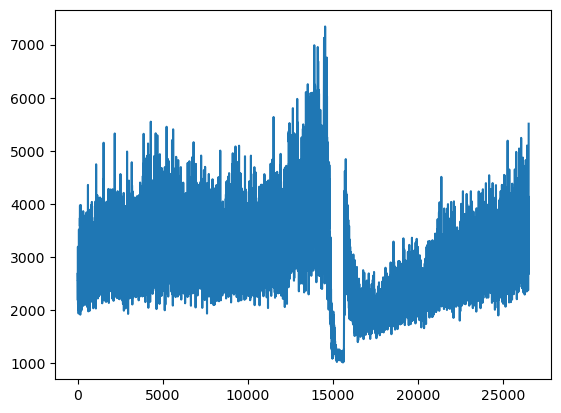

In [10]:
plt.plot(range(len(low)),low)
plt.show()

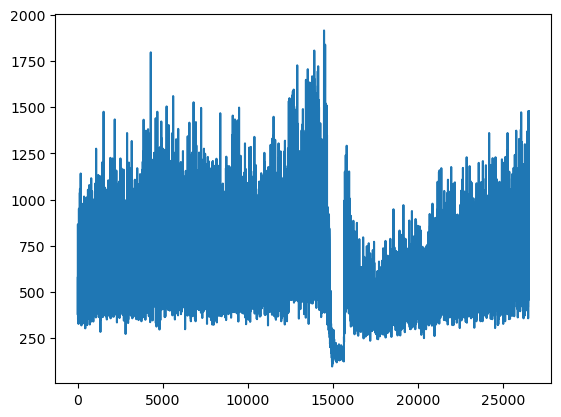

In [11]:
plt.plot(range(len(mid)),mid)
plt.show()

Null Hypothesis: a and b are compatible <br/>
    1) Get the distribution of (a-b)/sqrt(2*N)
         <pre>( since N isnt given,we use the estimator N=(a+b)/2 )</pre>
    2) Expect a normal gaussian,check summary statistic: average and sigma<br/>
    3) do same for all files,get histogram for all Lc_i<br/>
    4) make a simulation and check the expected vs the obsered

In [12]:
np.std(low)

554.3020487763939

In [13]:
np.std(mid)

654.4124174000614

In [14]:
np.mean(low)

1607.6780793242644

In [15]:
np.mean(mid)

1658.5950280910888

In [16]:
x=(low[4000:]-mid[4000:])/np.sqrt(low[4000:]+mid[4000:])

In [17]:
np.std(x)

2.603724457266773

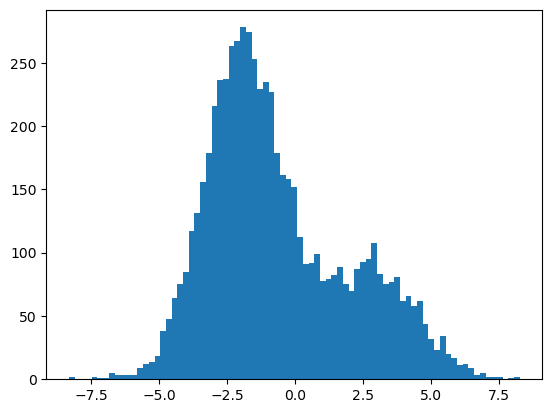

In [18]:
plt.hist(x,int(np.sqrt(len(x))))
plt.show()

In [19]:
total=0
for i in range(n):
    if(x[i]>0):
        total+=1
print(total)
print(total/n)

IndexError: index 6367 is out of bounds for axis 0 with size 6367

3578


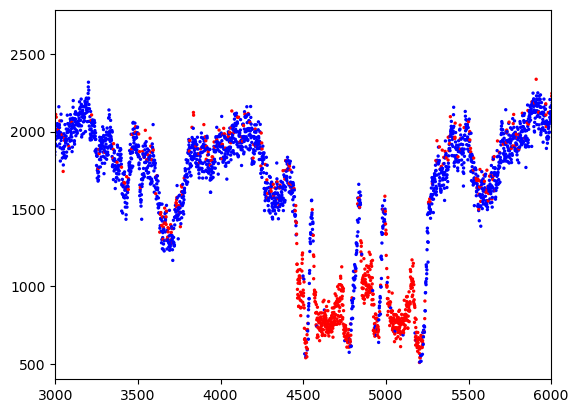

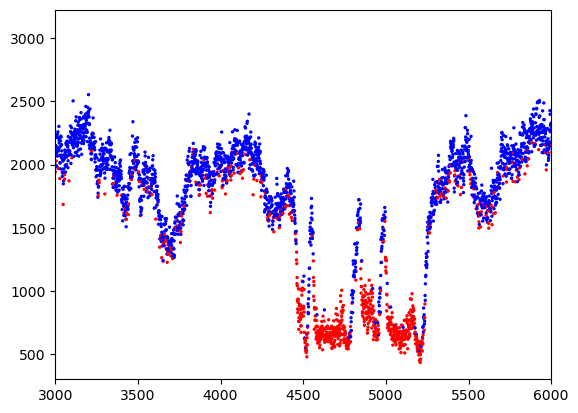

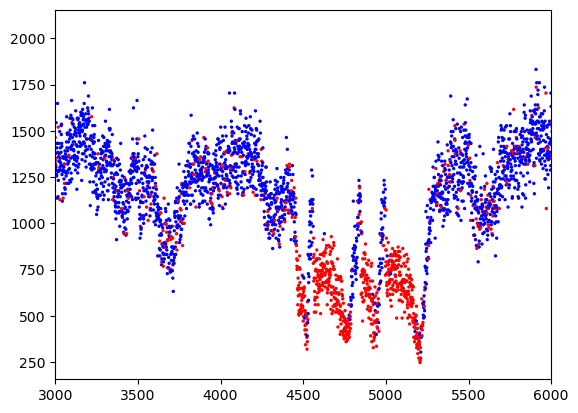

In [20]:
color=[]
list_=[]
r=0
for i in range(len(low)):
    if low[i]>=mid[i]: 
        color.append("red")
        r+=1
    else:
        color.append("blue")
        list_.append(i)


print(r)
plt.scatter(range(len(low)),low,c=color,s=2)

#plt.figure(figsize=(12, 6))  # Width is 12, Height is 6 (default is usually (6, 4))
plt.xlim(3000,6000)
#mplcursors.cursor()  # Enable zoomable interactivity
plt.show()
#plt.clear()
plt.scatter(range(len(low)),mid,c=color,s=2)
plt.xlim(3000,6000)
plt.show()
#
plt.scatter(range(len(high)),high,c=color,s=2)
plt.xlim(3000,6000)
plt.show()

3578


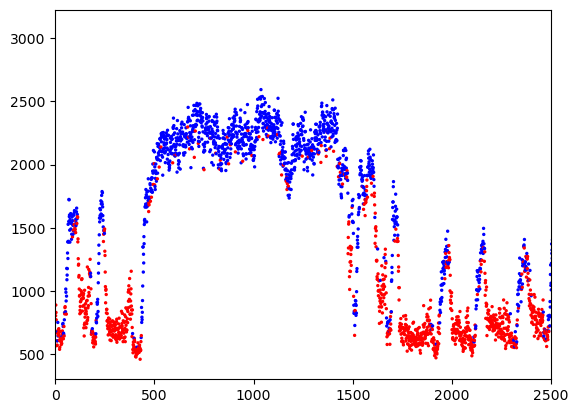

In [21]:
color=[]
list_=[]
r=0
for i in range(len(mid)):
    if low[i]>=mid[i]: 
        color.append("red")
        r+=1
    else:
        color.append("blue")
        list_.append(i)
        
print(r)
plt.scatter(range(len(low)),mid,c=color,s=2)
#plt.figure(figsize=(12, 6))  # Width is 12, Height is 6 (default is usually (6, 4))
plt.xlim(0,2500)
#mplcursors.cursor()  # Enable zoomable interactivity
plt.show()

In [122]:
len(low)

16959